In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#

### Analysis and visualization of Average appartment size and Price per Sq. m.

In [6]:
#import data 
df_lgh_area = pd.read_excel("SCB_fastig/lght_yta.xlsx")
df_markpriser = pd.read_excel('SCB_fastig/markpriser.xlsx')
df_byggnadspriser = pd.read_excel('SCB_fastig/byggnadspris.xlsx')

In [7]:
# function for cleaning data
def clear_df(df):
    df = df.T
    df.index = df.iloc[:,1]
    df.columns = df.iloc[0]
    df = df.iloc[6:,2:]
    df = df.replace(to_replace="..", value=np.nan, regex=True)
    df.astype("float")
    return df

In [8]:
#cleaning data
df_lgh_area = clear_df(df_lgh_area)
df_markpriser = clear_df(df_markpriser)
df_byggnadspriser = clear_df(df_byggnadspriser)



<AxesSubplot: xlabel='1'>

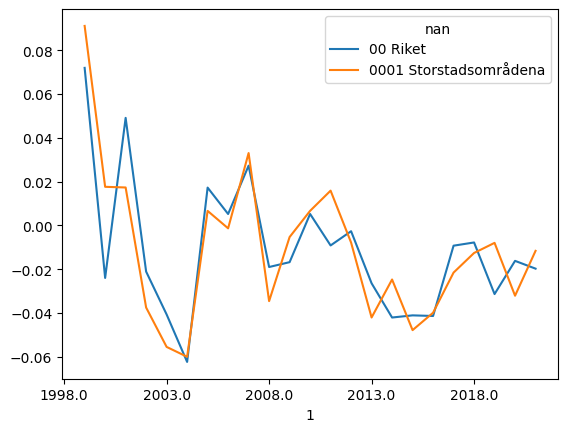

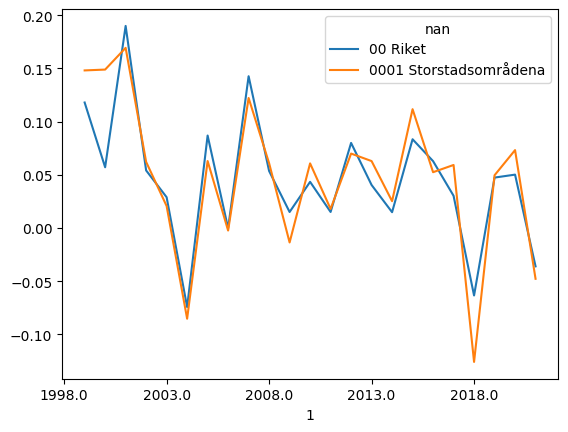

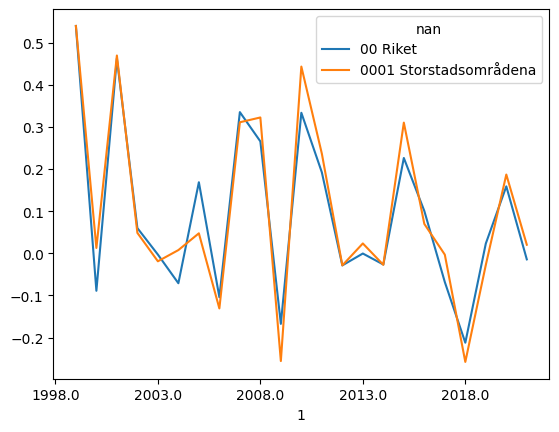

In [9]:
#Procent change
df_lgh_area.pct_change().iloc[:,:2].plot()
df_byggnadspriser.pct_change().iloc[:,:2].plot()
df_markpriser.pct_change().iloc[:,:2].plot()

In [13]:
#creating separate DF for graph 1
df = df_lgh_area["00 Riket"]
df = pd.DataFrame(df)
df = df.reset_index()
df['year'] = df[1].astype('int')
df.head()

,1,00 Riket,year
0,1998.0,77.8,1998
1,1999,83.4,1999
2,2000.0,81.4,2000
3,2001,85.4,2001
4,2002.0,83.6,2002


In [14]:
#creating separate DF for graph 2
df1 = df_byggnadspriser['00 Riket']
df1 = pd.DataFrame(df1)
df1 = df1.reset_index()
df1['year'] = df1[1].astype('int')
df1.head()

,1,00 Riket,year
0,1998.0,13337.0,1998
1,1999,14911.0,1999
2,2000.0,15763.0,2000
3,2001,18758.0,2001
4,2002.0,19774.0,2002


### Building linear regression for year and price estimation

In [17]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df['00 Riket'].values.reshape(-1, 1)
y = df['year'].astype('int').values

reg = LinearRegression().fit(X, y)

est_year = int(reg.predict(np.array([[1]])))
print(f'The year of appartments gettin 1 sq m. is {est_year}')

The year of appartments gettin 1 sq m. is 2071


In [19]:
y1 = df1['00 Riket'].values
X1 = df1[['year']].values

reg = LinearRegression().fit(X1, y1)

est_price= int(reg.predict(np.array([[2071]])))
print(f'The price for 1 sq m. will be {est_year}')

The price for 1 sq m. will be 2071


In [20]:
### Visualisation with seaborn

In [21]:
x = df_lgh_area.index.to_list()
y1 = df_lgh_area["00 Riket"].to_list()
y3 = df_lgh_area['0010 Stor-Stockholm'].to_list()
y2 = df_byggnadspriser['00 Riket'].to_list()
y4 = df_byggnadspriser['0010 Stor-Stockholm'].to_list()

Text(0.5, 1.0, 'APARTMENT SIZE (AVG) | PRICE PER SQ.M.')

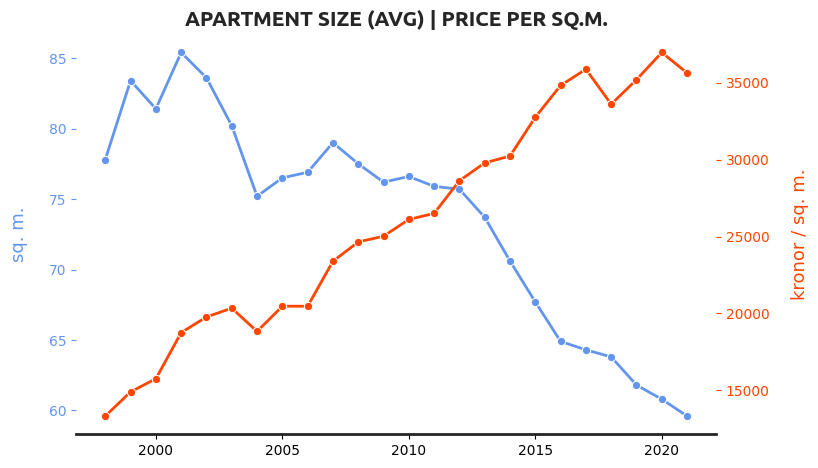

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

sns.set_style("white")
g = sns.lineplot(data = df_lgh_area, x= x, y= y1, ax=ax, color = "cornflowerblue",linewidth = 2, marker='o')
#g2 = sns.lineplot(data = df_lgh_area, x= x, y= y3, ax=ax, color = "lightsteelblue")
ax.set_ylabel("sq. m.", labelpad=15, color = "cornflowerblue", size = 13)
#ax.set_xlabel("year",color = "dimgrey", labelpad=15, size = 13)
ax.tick_params(axis='y', colors='cornflowerblue', labelsize = 10)


ax2 = ax.twinx()
sns.lineplot(data = df_byggnadspriser, x=x, y = y2, color = "orangered", ax=ax2, linewidth = 2, marker='o')
#sns.lineplot(data = df_byggnadspriser, x=x, y = y4, color = "darksalmon", ax=ax2)
ax2.set_ylabel("kronor / sq. m.", labelpad=15, color = "orangered", size = 13)
ax2.tick_params(axis='y', colors='orangered', labelsize = 10)
ax2.spines['bottom'].set_linewidth(2)

sns.despine(right=True, left = True)
plt.title('APARTMENT SIZE (AVG) | PRICE PER SQ.M.', size = 15,fontweight = 'heavy',  fontname="Ubuntu")

### Creating and visualization of price indexes

In [23]:
from sklearn import preprocessing
X = df_markpriser['00 Riket'].to_numpy().reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
X_mark= min_max_scaler.fit_transform(X).ravel()
X_mark


array([0.        , 0.10763278, 0.08031422, 0.20975495, 0.23425958,
       0.23296987, 0.20225114, 0.27001993, 0.22112792, 0.36205886,
       0.51119709, 0.39219135, 0.58951811, 0.74111854, 0.71415172,
       0.71368273, 0.68941259, 0.89049127, 1.        , 0.91816157,
       0.68108805, 0.70148904, 0.84464767, 0.82964005])

In [25]:
X = df_byggnadspriser['00 Riket'].to_numpy().reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
X_bygg= min_max_scaler.fit_transform(X).ravel()

Text(0.5, 1.0, 'PRICE INDEX DEVELOPMET')

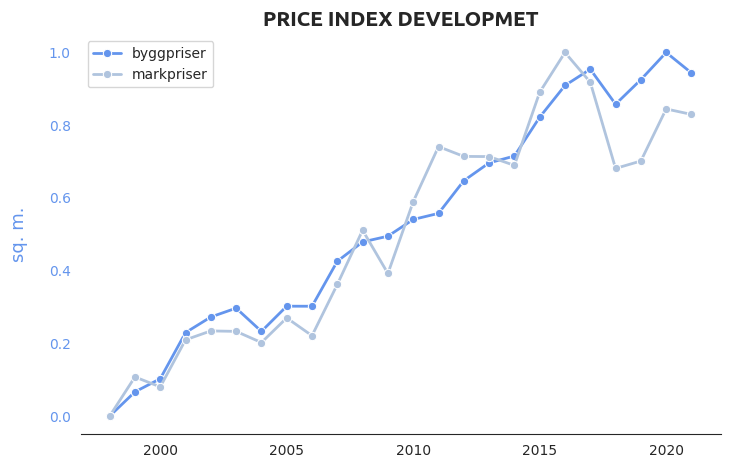

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

sns.set_style("white")
g = sns.lineplot(data = df_markpriser, x= x, y= X_bygg, ax=ax, color = "cornflowerblue",linewidth = 2, marker='o', label = 'byggpriser')
g2 = sns.lineplot(data = df_lgh_area, x= x, y= X_mark, ax=ax, color = "lightsteelblue",linewidth = 2, marker='o', label = 'markpriser')
ax.set_ylabel("sq. m.", labelpad=15, color = "cornflowerblue", size = 13)
#ax.set_xlabel("year",color = "dimgrey", labelpad=15, size = 13)
ax.tick_params(axis='y', colors='cornflowerblue', labelsize = 10)


#ax2 = ax.twinx()
#sns.lineplot(data = df_byggnadspriser, x=x, y = y2, color = "orangered", ax=ax2, linewidth = 3, marker='o')
#sns.lineplot(data = df_byggnadspriser, x=x, y = y4, color = "darksalmon", ax=ax2)
#ax2.set_ylabel("kronor / sq. m.", labelpad=15, color = "orangered", size = 13)
#ax2.tick_params(axis='y', colors='orangered', labelsize = 10)
#ax2.spines['bottom'].set_linewidth(2)

sns.despine(right=True, left = True)
plt.title('PRICE INDEX DEVELOPMET', size = 15,fontweight = 'heavy',  fontname="Ubuntu")